In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
import seaborn as sns


In [2]:
etfs = pd.read_csv('etfs_20160104_2022-09-30.csv')
etfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893585 entries, 0 to 893584
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   symbol       893585 non-null  object 
 1   asset_class  893585 non-null  object 
 2   assets       893585 non-null  float64
 3   smart_beta   893585 non-null  bool   
 4   date         893585 non-null  object 
 5   Open         893585 non-null  float64
 6   High         893585 non-null  float64
 7   Low          893585 non-null  float64
 8   Close        893585 non-null  float64
 9   ret          893585 non-null  float64
 10  spy_Open     893585 non-null  float64
 11  spy_Close    893585 non-null  float64
 12  spy_ret      893585 non-null  float64
dtypes: bool(1), float64(9), object(3)
memory usage: 82.7+ MB


In [3]:
etfs['date']=pd.to_datetime(etfs['date'])
etfs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893585 entries, 0 to 893584
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   symbol       893585 non-null  object        
 1   asset_class  893585 non-null  object        
 2   assets       893585 non-null  float64       
 3   smart_beta   893585 non-null  bool          
 4   date         893585 non-null  datetime64[ns]
 5   Open         893585 non-null  float64       
 6   High         893585 non-null  float64       
 7   Low          893585 non-null  float64       
 8   Close        893585 non-null  float64       
 9   ret          893585 non-null  float64       
 10  spy_Open     893585 non-null  float64       
 11  spy_Close    893585 non-null  float64       
 12  spy_ret      893585 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(9), object(2)
memory usage: 82.7+ MB


In [4]:
etfs.head()

,symbol,asset_class,assets,smart_beta,date,Open,High,Low,Close,ret,spy_Open,spy_Close,spy_ret
0,IVV,Equity,1.536663e+11,False,2017-01-04,204.415568,205.451331,204.406553,205.307220,0.006047,204.131852,205.000427,0.005949
1,VOO,Equity,1.391231e+11,False,2017-01-04,187.019320,187.903867,186.947110,187.705307,0.005901,204.131852,205.000427,0.005949
2,VTI,Equity,1.407120e+11,False,2017-01-04,105.558140,106.210685,105.512821,106.120049,0.007659,204.131852,205.000427,0.005949
3,QQQ,Equity,6.367904e+10,False,2017-01-04,114.847873,115.558060,114.838281,115.346924,0.005438,204.131852,205.000427,0.005949
4,VTV,Equity,5.901732e+10,True,2017-01-04,80.894209,81.195859,80.851113,81.135529,0.005447,204.131852,205.000427,0.005949


In [5]:
etfs.symbol.unique()

array(['IVV', 'VOO', 'VTI', 'QQQ', 'VTV', 'VEA', 'BND', 'AGG', 'IEFA',
       'VUG', 'VWO', 'IJR', 'IEMG', 'VIG', 'IWF', 'IJH', 'GLD', 'IWM',
       'IWD', 'VO', 'BNDX', 'VYM', 'VXUS', 'VCSH', 'EFA', 'ITOT', 'VGT',
       'BSV', 'VCIT', 'VB', 'XLK', 'XLV', 'SCHD', 'VNQ', 'XLE', 'LQD',
       'VEU', 'RSP', 'IVW', 'XLF', 'SHY', 'MUB', 'USMV', 'TIP', 'SCHX',
       'IAU', 'DIA', 'IWB', 'IWR', 'IXUS', 'TLT', 'BIL', 'SCHF', 'SHV',
       'VV', 'GOVT', 'IVE', 'EEM', 'DGRO', 'IEF', 'VBR', 'IGSB', 'VT',
       'SDY', 'ESGU', 'DVY', 'MBB', 'VTIP', 'SCHB', 'VTEB', 'QUAL',
       'IUSB', 'XLU', 'MDY', 'VGSH', 'VHT', 'XLP', 'XLY', 'ACWI', 'SCHP',
       'VOE', 'PFF', 'VMBS', 'EMB', 'SCHG', 'SPLG', 'SCHA', 'EFV', 'VGK',
       'SPYG', 'BIV', 'VXF', 'STIP', 'IWS', 'IEI', 'SPYV', 'VGIT', 'HDV',
       'VBK', 'XLI', 'FVD', 'MINT', 'HYG', 'IWP', 'IWN', 'IUSV', 'GSLC',
       'IUSG', 'MGK', 'SPDW', 'SPLV', 'SCHO', 'IWV', 'NOBL', 'FLOT',
       'IGIB', 'MTUM', 'SLV', 'SCZ', 'SUB', 'VOT', 'SCHV', 'FNDX', 

In [6]:
len(etfs.symbol.unique())

620

In [7]:
days_by_symbol = pd.DataFrame( etfs['symbol'].value_counts() )
days_by_symbol.describe()

,symbol
count,620.000000
mean,1441.266129
std,56.738198
min,58.000000
25%,1445.000000
50%,1445.000000
75%,1445.000000
max,1445.000000


In [8]:
## Determine the maximum number of days am ETF may have in the data frame etf
days_by_symbol.mean()

symbol    1441.266129
dtype: float64

In [9]:
## Here we need a better approach, How many ETFs have data over the entire period? Answer is 31

pd.DataFrame( etfs['date'].value_counts() ).head(31)


,date
2021-07-27,620
2021-10-12,620
2018-11-13,620
2018-01-22,620
2019-09-05,620
2021-08-23,620
2020-10-09,620
2019-06-11,620
2019-11-21,620
2019-02-28,620


In [10]:
### 2.	The objective here is to filter monthly prices, calculate monthly returns, write a function that calculate each beta of the symbols in the data frame etfs.
### a.	Run the following code and be ready to explain what is it doing


import datetime
etfs['SPY'] = etfs[ 'spy_Close' ]



In [11]:
etfs

,symbol,asset_class,assets,smart_beta,date,Open,High,Low,Close,ret,spy_Open,spy_Close,spy_ret,SPY
0,IVV,Equity,1.536663e+11,False,2017-01-04,204.415568,205.451331,204.406553,205.307220,0.006047,204.131852,205.000427,0.005949,205.000427
1,VOO,Equity,1.391231e+11,False,2017-01-04,187.019320,187.903867,186.947110,187.705307,0.005901,204.131852,205.000427,0.005949,205.000427
2,VTI,Equity,1.407120e+11,False,2017-01-04,105.558140,106.210685,105.512821,106.120049,0.007659,204.131852,205.000427,0.005949,205.000427
3,QQQ,Equity,6.367904e+10,False,2017-01-04,114.847873,115.558060,114.838281,115.346924,0.005438,204.131852,205.000427,0.005949,205.000427
4,VTV,Equity,5.901732e+10,True,2017-01-04,80.894209,81.195859,80.851113,81.135529,0.005447,204.131852,205.000427,0.005949,205.000427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893580,VIOG,Equity,4.541160e+08,True,2022-09-29,176.839996,176.839996,173.990005,175.779999,-0.019741,366.809998,362.790009,-0.020889,362.790009
893581,RWX,Real Estate,4.510210e+08,False,2022-09-29,23.670000,23.709999,23.400000,23.650000,-0.013350,366.809998,362.790009,-0.020889,362.790009
893582,MDIV,Multi-Asset,4.465110e+08,False,2022-09-29,14.590000,14.600000,14.270000,14.370000,-0.022449,366.809998,362.790009,-0.020889,362.790009
893583,SPHB,Equity,4.423050e+08,True,2022-09-29,59.389999,59.400002,58.009998,58.660000,-0.029451,366.809998,362.790009,-0.020889,362.790009


In [12]:
etfs['stock'] = etfs[ 'Close' ]
etfs['year'] = etfs['date'].dt.year
etfs['month'] = etfs['date'].dt.month


In [13]:
etfs

,symbol,asset_class,assets,smart_beta,date,Open,High,Low,Close,ret,spy_Open,spy_Close,spy_ret,SPY,stock,year,month
0,IVV,Equity,1.536663e+11,False,2017-01-04,204.415568,205.451331,204.406553,205.307220,0.006047,204.131852,205.000427,0.005949,205.000427,205.307220,2017,1
1,VOO,Equity,1.391231e+11,False,2017-01-04,187.019320,187.903867,186.947110,187.705307,0.005901,204.131852,205.000427,0.005949,205.000427,187.705307,2017,1
2,VTI,Equity,1.407120e+11,False,2017-01-04,105.558140,106.210685,105.512821,106.120049,0.007659,204.131852,205.000427,0.005949,205.000427,106.120049,2017,1
3,QQQ,Equity,6.367904e+10,False,2017-01-04,114.847873,115.558060,114.838281,115.346924,0.005438,204.131852,205.000427,0.005949,205.000427,115.346924,2017,1
4,VTV,Equity,5.901732e+10,True,2017-01-04,80.894209,81.195859,80.851113,81.135529,0.005447,204.131852,205.000427,0.005949,205.000427,81.135529,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893580,VIOG,Equity,4.541160e+08,True,2022-09-29,176.839996,176.839996,173.990005,175.779999,-0.019741,366.809998,362.790009,-0.020889,362.790009,175.779999,2022,9
893581,RWX,Real Estate,4.510210e+08,False,2022-09-29,23.670000,23.709999,23.400000,23.650000,-0.013350,366.809998,362.790009,-0.020889,362.790009,23.650000,2022,9
893582,MDIV,Multi-Asset,4.465110e+08,False,2022-09-29,14.590000,14.600000,14.270000,14.370000,-0.022449,366.809998,362.790009,-0.020889,362.790009,14.370000,2022,9
893583,SPHB,Equity,4.423050e+08,True,2022-09-29,59.389999,59.400002,58.009998,58.660000,-0.029451,366.809998,362.790009,-0.020889,362.790009,58.660000,2022,9


In [14]:
etfs_m = etfs.sort_values(by=['symbol', 'year' , 'month'])
etfs_m

,symbol,asset_class,assets,smart_beta,date,Open,High,Low,Close,ret,spy_Open,spy_Close,spy_ret,SPY,stock,year,month
280,AAXJ,Equity,2.197991e+09,False,2017-01-04,50.587253,50.950147,50.587253,50.823135,0.009915,204.131852,205.000427,0.005949,205.000427,50.823135,2017,1
894,AAXJ,Equity,2.228987e+09,False,2017-01-05,51.331193,51.666868,51.331193,51.539856,0.014102,204.719976,204.837585,-0.000794,204.837585,51.539856,2017,1
1508,AAXJ,Equity,2.218001e+09,False,2017-01-06,51.331192,51.376553,51.167890,51.285828,-0.004929,204.955191,205.570435,0.003578,205.570435,51.285828,2017,1
2121,AAXJ,Equity,2.219963e+09,False,2017-01-09,51.267679,51.476345,51.258608,51.331188,0.000884,205.298985,204.891846,-0.003301,204.891846,51.331188,2017,1
2733,AAXJ,Equity,2.241542e+09,False,2017-01-10,51.721292,52.138621,51.703150,51.830162,0.009721,204.909931,204.891846,0.000000,204.891846,51.830162,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891085,ZROZ,Bond,5.061028e+08,False,2022-09-23,96.650002,98.160004,95.620003,97.209999,0.005794,370.579987,367.950012,-0.016755,367.950012,97.209999,2022,9
891704,ZROZ,Bond,4.957423e+08,False,2022-09-26,97.010002,97.300003,94.480003,95.220001,-0.020471,366.410004,364.309998,-0.009893,364.309998,95.220001,2022,9
892323,ZROZ,Bond,4.743445e+08,False,2022-09-27,93.430000,93.879997,91.110001,91.110001,-0.043163,368.019989,363.380005,-0.002553,363.380005,91.110001,2022,9
892942,ZROZ,Bond,4.974083e+08,False,2022-09-28,93.910004,95.660004,93.029999,95.540001,0.048623,364.380005,370.529999,0.019676,370.529999,95.540001,2022,9


In [15]:
etfs_m = etfs_m.groupby(['symbol', 'year' , 'month']).tail(1)
etfs_m

,symbol,asset_class,assets,smart_beta,date,Open,High,Low,Close,ret,spy_Open,spy_Close,spy_ret,SPY,stock,year,month
11331,AAXJ,Equity,2.314521e+09,False,2017-01-31,53.381538,53.590201,53.372467,53.517624,0.003231,205.362334,205.859955,-0.000088,205.859955,53.517624,2017,1
23000,AAXJ,Equity,2.378475e+09,False,2017-02-28,55.214140,55.223211,54.941971,54.996403,-0.003452,214.129451,213.948502,-0.002699,213.948502,54.996403,2017,2
37150,AAXJ,Equity,2.469503e+09,False,2017-03-31,57.182836,57.237271,57.073969,57.101185,-0.004901,214.361323,214.215942,-0.002328,214.215942,57.101185,2017,3
48839,AAXJ,Equity,2.519332e+09,False,2017-04-28,58.335023,58.335023,58.153572,58.253368,-0.000467,217.087424,216.342300,-0.002179,216.342300,58.253368,2017,4
62401,AAXJ,Equity,2.619383e+09,False,2017-05-31,60.857125,60.857125,60.485156,60.566811,-0.004325,219.758935,219.395462,-0.000249,219.395462,60.566811,2017,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841562,ZROZ,Bond,5.681728e+08,False,2022-05-31,110.186148,110.186148,108.276959,109.132118,-0.029877,410.086696,409.471893,-0.005611,409.471893,109.132118,2022,5
854561,ZROZ,Bond,5.609250e+08,False,2022-06-30,107.630617,108.903409,107.451630,107.739998,0.013564,374.700787,375.706665,-0.008124,375.706665,107.739998,2022,6
866943,ZROZ,Bond,5.730556e+08,False,2022-07-29,110.580002,112.790001,110.040001,110.070000,-0.004972,405.912573,410.304535,0.014579,410.304535,110.070000,2022,7
881181,ZROZ,Bond,5.441608e+08,False,2022-08-31,105.599998,106.449997,104.099998,104.519997,-0.014984,398.293861,393.563293,-0.007609,393.563293,104.519997,2022,8


In [16]:
etfs_m = etfs_m[['SPY', 'stock', 'symbol' , 'asset_class' , 'assets', 'date']]
etfs_m

,SPY,stock,symbol,asset_class,assets,date
11331,205.859955,53.517624,AAXJ,Equity,2.314521e+09,2017-01-31
23000,213.948502,54.996403,AAXJ,Equity,2.378475e+09,2017-02-28
37150,214.215942,57.101185,AAXJ,Equity,2.469503e+09,2017-03-31
48839,216.342300,58.253368,AAXJ,Equity,2.519332e+09,2017-04-28
62401,219.395462,60.566811,AAXJ,Equity,2.619383e+09,2017-05-31
...,...,...,...,...,...,...
841562,409.471893,109.132118,ZROZ,Bond,5.681728e+08,2022-05-31
854561,375.706665,107.739998,ZROZ,Bond,5.609250e+08,2022-06-30
866943,410.304535,110.070000,ZROZ,Bond,5.730556e+08,2022-07-29
881181,393.563293,104.519997,ZROZ,Bond,5.441608e+08,2022-08-31


In [17]:
etfs_m.shape

(42745, 6)

In [18]:
# b.	Verify that the following is a function that 
# (i) takes a data frame in which the first two columns are [factor-price , stock -price]: 
# (ii) Creates a return-data-frame for these columns; 
# (iii) Calculates stats on this data frame that includes the beta of the stock on the factor; 
# (iv) outputs these stats into a dictionary.
# Run this code and make sure it produces no errors.

def sfm(df):
    """ this functions takes a returns-data frame and returns
    a dictionary of the Single Factor Model parameter estimates"""
    
    factor = df.columns[0]  # factor is the first columnin df
    stock = df.columns[1]
    df0=df[[factor, stock]] # creates df0, a data frame that includes the first and the second columns
    df_ret=df0.pct_change() # creates return data
    df_ret= df_ret.dropna() # drops Na
    N_obs = df_ret.shape[0] # the number of rows(observations) in df_ret
    # the following calculates 
    factor_mean= df_ret[factor].mean() 
    stock_mean = df_ret[stock].mean()
    factor_std= df_ret[factor].std()
    stock_std = df_ret[stock].std()
    stock_corr = df_ret[factor].corr(df_ret[stock] )
    stock_beta = stock_corr*stock_std/factor_std
    stock_alpha= stock_mean -stock_beta*factor_mean
    res_std = np.sqrt(stock_std**2 -  stock_beta**2 * factor_std**2)
    # the puts results in a dictionar
    sf_dic = {'factor': factor , 'factor_mean':factor_mean,
    'stock_mean': stock_mean, 'factor_std':factor_std ,
    'stock_std':stock_std,'stock_corr':stock_corr ,'stock_beta': stock_beta, 'stock_alpha': stock_alpha ,
       'res_std' :res_std , 'N_obs' : N_obs   }
    return sf_dic



In [19]:
sfm(etfs_m)

{'factor': 'SPY',
 'factor_mean': 0.0031478588185021076,
 'stock_mean': 0.005906210417930473,
 'factor_std': 0.07132235964345222,
 'stock_std': 0.1467038129159735,
 'stock_corr': 0.14811927214673087,
 'stock_beta': 0.30466829895832076,
 'stock_alpha': 0.004947157626336486,
 'res_std': 0.14508559719653025,
 'N_obs': 42744}

In [20]:
sym =etfs_m [ etfs_m ['symbol']== 'ANGL'  ]
sym.head(3)

,SPY,stock,symbol,asset_class,assets,date
11316,205.859955,22.125971,ANGL,Bond,2.441182e+09,2017-01-31
22985,213.948502,22.391851,ANGL,Bond,2.470517e+09,2017-02-28
37135,214.215942,22.477783,ANGL,Bond,2.479998e+09,2017-03-31


In [21]:
sfm(sym)

{'factor': 'SPY',
 'factor_mean': 0.00954082819101948,
 'stock_mean': 0.003096935122964325,
 'factor_std': 0.0486073401965714,
 'stock_std': 0.03082405302751856,
 'stock_corr': 0.8270931537992838,
 'stock_beta': 0.5244961589814572,
 'stock_alpha': -0.0019071926167273968,
 'res_std': 0.01732511727141767,
 'N_obs': 68}

In [22]:
# 3.	The objective here is to iterate over all stocks in etfs_m data frame to 
# (i) apply sfm for each stock; 
# (ii) create a data frame the with columns that include ETF’, asset_class, and assets and append results in a data frame. 
# Run the following code and be ready to explain what each line does
# a.	Run the following code and be ready to explain what each line does

symbols= etfs_m['symbol'].unique()
N= len(symbols)
betas =pd.DataFrame()
for i in range(0,N):
    sym = etfs_m[etfs_m['symbol']== symbols[i]]
    if sym.shape[0] > 0:
        asset_class = list( sym['asset_class']) [1]
        assets = list( sym['assets']) [1]
        print(i, sym.shape[0], symbols[i], asset_class , assets)
        out_i = sfm(sym)  ## apply the function and get a dictionary
        out_i['symbol'] =  symbols[i]
        out_i['asset_class'] =  asset_class
        out_i['assets'] = assets
        # The following append the dictionary to the data Frame
        betas = betas.append(out_i,ignore_index=True, sort=False) 
betas= betas[['symbol', 'asset_class', 'assets', 'factor' , 'N_obs', 'stock_beta', 'stock_alpha',
      'stock_corr', 'stock_mean', 'factor_mean', 'stock_std', 'factor_std' ,'res_std' ]]
betas.head()




0 69 AAXJ Equity 2378475351.074301


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

1 69 ACWI Equity 10313617604.71708
2 69 ACWV Equity 3185491970.221086
3 69 ACWX Equity 3105815454.619468
4 69 AGG Bond 76603266304.77136
5 69 AGGY Bond 883563960.283527
6 69 AGZ Bond 559817928.6533989
7 69 AIA Equity 1098097459.2088535
8 69 AMJ Equity 2475673126.7029376
9 69 AMLP Equity 6420355848.120037
10 69 ANGL Bond 2470516745.9110007
11 69 AOA Multi-Asset 979341993.5360184
12 69 AOK Multi-Asset 800947091.0009549
13 69 AOM Multi-Asset 1182582325.2603087
14 69 AOR Multi-Asset 1426405509.6673267
15 69 ARKG Equity 1293685015.1230886
16 69 ARKK Equity 4010818427.324104
17 69 ARKQ Equity 479126913.37171566
18 69 ARKW Equity 616990605.2675155
19 69 ASHR Equity 1355211936.655642
20 69 BAB Bond 1500826680.5601747
21 69 BIL Bond 22516529023.14183
22 69 BIV Bond 11907753669.440483
23 69 BIZD Equity 391430519.5315461
24 69 BKLN Bond 3027938901.548032
25 69 BLV Bond 3992492490.450612
26 69 BND Bond 77797115356.11449
27 69 BNDX Bond 43106211424.681145
28 69 BOND Bond 3007522487.0225787
29 69 BO

C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

31 69 BSCN Bond 2159817255.6152506
32 69 BSCO Bond 2848173445.363578
33 69 BSCP Bond 1452569918.4235752
34 69 BSCQ Bond 1046947478.8291948
35 69 BSJM Bond 483485780.5525808
36 69 BSJN Bond 615115458.2920481
37 69 BSJO Bond 429641264.8776217
38 69 BSV Bond 37120828554.56065
39 69 BWX Bond 935429119.5081366
40 69 CATH Equity 303852491.6794176
41 69 CDC Equity 1169672102.32892
42 69 CFA Equity 331198980.4640526
43 69 CFO Equity 525792948.3490716
44 69 CGW Equity 561531436.6737546


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

45 69 CIBR Equity 2542895728.0210395
46 69 CMBS Bond 611613544.2334107
47 69 CMF Bond 1636851357.2047355
48 69 CNYA Equity 379606062.8132213
49 69 COMT Multi-Asset 1505366114.553222
50 69 COPX Equity 924746389.0606216
51 69 CORP Bond 557649143.9740448
52 69 COWZ Equity 3844290292.2504935
53 69 CQQQ Equity 916086123.4489183
54 69 CRBN Equity 553487142.9716945
55 69 CWB Bond 2562853781.6836963
56 69 CWI Equity 1181766194.4070735
57 69 CXSE Equity 645685754.1944219
58 69 DBA Commodity 1459081385.6211278
59 69 DBC Commodity 1893365994.725285
60 69 DBEF Equity 2835286481.990015


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

61 69 DBEU Equity 346226520.86783946
62 69 DEM Equity 1456299514.3112905
63 69 DES Equity 1436000426.113853
64 69 DGRO Equity 12731832508.965893
65 69 DGRW Equity 3674243557.692992
66 69 DGS Equity 1848574253.554208
67 69 DHS Equity 837768943.9888021
68 69 DIA Equity 16030539465.137686
69 69 DIV Equity 628064383.2320809
70 69 DIVO Multi-Asset 1036468726.8071046
71 69 DJP Commodity 593057618.378874
72 69 DLN Equity 2111061782.9090664
73 69 DLS Equity 1019620359.8395016
74 69 DON Equity 2112611232.811468


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

75 69 DSI Equity 1968198445.1633632
76 69 DTD Equity 642113501.5343028
77 69 DVY Equity 13790272664.016682
78 69 DVYE Equity 623779118.622377
79 69 DWM Equity 503037915.26615566
80 69 DWX Equity 469806588.9388024
81 69 DXJ Equity 1361248536.6259575
82 69 EBND Bond 2327265234.0767894
83 69 ECH Equity 670996763.0255876
84 69 EDV Bond 1254511798.8899248
85 69 EELV Equity 715424000.9050664
86 69 EEM Equity 20835925606.75317
87 69 EEMA Equity 415127879.3293988
88 69 EEMV Equity 5216058476.138701
89 69 EES Equity 409047196.5365354
90 69 EFA Equity 35779375106.98596
91 69 EFAV Equity 6207733422.207929


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

92 69 EFG Equity 7228305072.335753
93 69 EFV Equity 12489068153.632528
94 69 EIDO Equity 476900248.35671175
95 69 EMB Bond 14930098883.48924
96 69 EMGF Equity 655057312.7307392
97 69 EMLC Bond 3158245853.9099064
98 69 EMLP Equity 1915609226.1035616
99 69 EMQQ Equity 516767242.1442113
100 69 EPI Equity 451442702.8427556
101 69 EPP Equity 1765348547.387524
102 69 EPS Equity 358301396.1320248
103 69 EQAL Equity 382974957.37649626
104 69 ESGD Equity 5154049325.573809
105 69 ESGE Equity 3632848899.508487
106 69 ESGU Equity 11971049825.584051
107 69 EUFN Equity 1212064071.5479553
108 69 EWA Equity 1237315575.961113
109 69 EWC Equity 2505654709.2302856
110 69 EWG Equity 1312604567.7717352


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

111 69 EWH Equity 676151718.8339069
112 69 EWJ Equity 7942613105.805661
113 69 EWL Equity 900170360.7916479
114 69 EWQ Equity 599445408.551927
115 69 EWS Equity 515718126.2591048
116 69 EWT Equity 1999935389.519216
117 69 EWU Equity 3026719577.5230103
118 69 EWW Equity 564550997.0430994
119 69 EWX Equity 456012915.9113855
120 69 EWY Equity 2764439979.2488365
121 69 EWZ Equity 5040681921.461872
122 69 EZM Equity 481257208.4500888
123 69 EZU Equity 4136417798.75034
124 69 FALN Bond 1912138908.9886577
125 69 FBND Bond 2077684845.0406585
126 69 FBT Equity 957907592.1675936
127 69 FCG Equity 712247168.0739722


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

128 69 FCOM Equity 427431349.7136171
129 69 FDIS Equity 541274743.8943125
130 69 FDL Equity 2172126657.0959115
131 69 FDN Equity 2574375870.3296933
132 69 FDRR Equity 348040896.1918934
133 69 FDVV Equity 760175209.4216282
134 69 FENY Equity 1015833284.53827
135 69 FEX Equity 646509636.661285
136 69 FEZ Equity 1186257012.1491125
137 69 FGD Equity 471678759.10228014
138 69 FHLC Equity 1555114905.5654995
139 69 FIDU Equity 415006020.1729788
140 69 FINX Equity 372684419.83225024
141 69 FIW Equity 631121738.8084531
142 69 FLCO Bond 568340306.4502101
143 69 FLOT Bond 8618773581.64298


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

144 69 FLRN Bond 2995969590.20618
145 69 FLTR Bond 1029070460.1710422
146 69 FMB Bond 1666894660.9440205
147 69 FNCL Equity 1030150492.97828
148 69 FNDA Equity 3793482163.760093
149 69 FNDC Equity 2213099992.1623287
150 69 FNDE Equity 3974967083.990417
151 69 FNDF Equity 5972937346.983909
152 69 FNDX Equity 5347178227.886343
153 69 FNX Equity 584311539.9737943
154 69 FPE Preferred Stock 5509335975.986642
155 69 FPX Equity 625148937.3320788
156 69 FREL Real Estate 1208576444.2760506
157 69 FSTA Equity 696650216.4775275
158 69 FTA Equity 775227579.3693684
159 69 FTC Equity 487302110.0144411
160 69 FTCS Equity 4521683537.877561


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

161 69 FTEC Equity 2022127829.038029
162 69 FTGC Commodity 2910493797.441664
163 69 FTLS Alternatives 348115312.08889526
164 69 FTSL Bond 2693867409.4427395
165 69 FTSM Bond 5905075966.42168
166 69 FTXG Equity 637014893.3677491
167 69 FTXN Equity 744846652.7004381
168 69 FUTY Equity 1365916402.811747
169 69 FV Equity 1451501864.417551
170 69 FVD Equity 8723017622.68067
171 69 FXG Equity 436961533.1278191
172 69 FXH Equity 877380338.2547421
173 69 FXI Equity 6048884534.688533
174 69 FXL Equity 438589183.9214273
175 69 FXN Equity 1373181610.930278
176 69 FXO Equity 704100952.4103146
177 69 FXR Equity 974859096.762279
178 69 FXZ Equity 829988131.5814921


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

179 69 FYX Equity 512029030.4326053
180 69 GBIL Bond 3440436058.0255675
181 69 GCOW Equity 533663919.65468746
182 69 GDX Equity 7902966200.876411
183 69 GDXJ Equity 3347632821.070567
184 69 GEM Equity 891863772.301241
185 69 GII Equity 396978001.7492508
186 69 GLD Commodity 38193842030.543625
187 69 GLTR Commodity 739939095.0020281
188 69 GNR Equity 2120495116.617493
189 69 GOVT Bond 22381185109.208435
190 69 GRID Equity 273239638.4874694
191 69 GSG Commodity 1046855919.9573082
192 69 GSIE Equity 2155787602.584551
193 69 GSLC Equity 6354904490.52523
194 69 GSY Bond 2048003104.778204
195 69 GTO Bond 729836264.9593521
196 69 GUNR Equity 4104273969.563596
197 69 GVI Bond 2225611182.214721


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

198 69 GWX Equity 589297694.5752697
199 69 GXC Equity 1222247298.4707391
200 69 HACK Equity 923276422.7840176
201 69 HAUZ Real Estate 491640870.05211294
202 69 HDEF Equity 859437060.80715
203 69 HDV Equity 8479794349.298398
204 69 HEDJ Equity 961600368.9354552
205 69 HEFA Equity 2504129998.7070003
206 69 HYD Bond 2653014057.6488447
207 69 HYG Bond 10290925220.339718
208 69 HYLB Bond 3067063335.6004763
209 69 HYLS Bond 1525656502.33276
210 69 HYMB Bond 1679929852.175912
211 69 HYS Bond 1089127239.1447852
212 69 IAGG Bond 3501186459.503845
213 69 IAI Equity 259082325.5311625
214 69 IAT Equity 640516269.4326676
215 69 IAU Commodity 19317476815.608883
216 69 IBB Equity 6044104714.81083
217 69 IBDN Bond 1227333695.0423496
218 69 IBDO Bond 1646167216.476927
219 69 IBDP Bond 1623144738.529928


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

220 69 IBDQ Bond 1264441338.767061
221 69 IBDR Bond 1029774516.7609608
222 69 ICF Real Estate 1833201561.840721
223 69 ICLN Equity 2052033461.3264108
224 69 ICSH Bond 6321123578.543092
225 69 ICVT Bond 1050456031.385297
226 69 IDU Equity 663911456.1147164
227 69 IDV Equity 3616794923.9611297
228 69 IEF Bond 21217268692.42526
229 69 IEFA Equity 67587984055.29466
230 69 IEI Bond 11589993454.718956
231 69 IEMG Equity 53253987576.01556
232 69 IEO Equity 527975484.6411027
233 69 IEUR Equity 2709288047.990804
234 69 IEV Equity 1195270448.448368
235 69 IGE Equity 605255323.2018437
236 69 IGF Equity 2644447789.906442
237 69 IGIB Bond 8784925343.381172


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

238 69 IGLB Bond 1319331792.9605815
239 69 IGM Equity 1339635027.3133912
240 69 IGOV Bond 1072910832.2488184
241 69 IGSB Bond 19472041736.915085
242 69 IGV Equity 2022587563.2773216
243 69 IHDG Equity 778714619.4688601
244 69 IHF Equity 742290886.9724354
245 69 IHI Equity 2951920587.3293667
246 69 IJH Equity 39465554592.68348
247 69 IJJ Equity 4806175398.361154
248 69 IJK Equity 4409053318.229978
249 69 IJR Equity 42800761646.6409
250 69 IJS Equity 4640667233.872525
251 69 IJT Equity 3335603312.837643
252 69 ILCB Equity 431500821.5021291
253 69 ILCG Equity 740846277.2491311
254 69 ILCV Equity 492314824.56379694
255 69 ILF Equity 1011937734.1980308
256 69 IMCB Equity 481727704.16774446


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

257 69 IMCG Equity 599089594.8707107
258 69 IMTM Equity 601771548.394032
259 69 INDA Equity 2806776430.936725
260 69 INDY Equity 373622710.4943967
261 69 INTF Equity 708584497.7125382
262 69 IOO Equity 1989305492.8213408
263 69 IPAC Equity 1338485244.014336
264 69 IPAY Equity 366814623.2533859
265 69 IQLT Equity 2713695952.207431
266 69 ISTB Bond 4894341630.536083
267 69 ITA Equity 2640866353.486575
268 69 ITB Equity 649591917.4837329
269 69 ITM Bond 1502248734.5461268
270 69 ITOT Equity 23914972748.599857
271 69 IUSB Bond 16408455629.116964
272 69 IUSG Equity 5579469416.929671
273 69 IUSV Equity 8451964950.784451
274 69 IVE Equity 15298706042.323215


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

275 69 IVLU Equity 1304006165.9326224
276 69 IVOG Equity 472047179.7987518
277 69 IVOO Equity 1006902710.7774664
278 69 IVOV Equity 528777972.2478656
279 69 IVV Equity 160461427475.92148
280 69 IVW Equity 14309692166.7791
281 69 IWB Equity 14929790170.800829
282 69 IWC Equity 641979378.0936785
283 69 IWD Equity 35381251369.89372
284 69 IWF Equity 28047027884.080826
285 69 IWL Equity 420675985.3475976
286 69 IWM Equity 36797803212.878365
287 69 IWN Equity 9085712505.975714
288 69 IWO Equity 6317314866.622195
289 69 IWP Equity 6881821026.758352
290 69 IWR Equity 17009492944.156635
291 69 IWS Equity 9174806026.243095
292 69 IWV Equity 5840379939.332914
293 69 IWX Equity 932337998.2777094
294 69 IWY Equity 2045548604.8353207
295 69 IXC Equity 1415702792.0275104
296 69 IXG Equity 578108325.5116798


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

297 69 IXJ Equity 2051627137.651968
298 69 IXN Equity 1284115881.9098997
299 69 IXUS Equity 21805768025.56488
300 69 IYC Equity 429235301.6849902
301 69 IYE Equity 1460012907.1114516
302 69 IYF Equity 1291164613.445504
303 69 IYG Equity 926452277.8817364
304 69 IYH Equity 1665019854.553131
305 69 IYJ Equity 675809869.57467
306 69 IYK Equity 837986329.8275542
307 69 IYM Equity 589313423.0787673
308 69 IYR Real Estate 3100114248.805495
309 69 IYT Equity 601603488.3157065
310 69 IYW Equity 2510652131.0070524
311 69 IYY Equity 842245964.4214106
312 69 IYZ Equity 614435712.9982892
313 69 JETS Equity 3609880835.855096
314 69 JHML Equity 424151259.01281327
315 69 JHMM Equity 1539892134.7149382


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

316 69 JNK Bond 4546932331.935457
317 69 JPIN Equity 646479006.8928001
318 69 JPUS Equity 305112060.44261086
319 69 KBA Equity 468673832.0264967
320 69 KBE Equity 1725704895.4569886
321 69 KBWB Equity 1587106432.7806842
322 69 KRE Equity 2583077052.807904
323 69 KRMA Equity 359491601.150256
324 69 KSA Equity 530277966.76224434
325 69 KWEB Equity 7957348684.756503
326 69 KXI Equity 922018810.969414
327 69 LDUR Bond 1338664483.690248
328 69 LGLV Equity 324682206.4076758
329 69 LIT Equity 1478108887.7407038
330 69 LMBS Bond 4865231431.434336
331 69 LQD Bond 31920039884.626858
332 69 LQDH Bond 774381714.9292513
333 69 LRGF Equity 694437990.0436615


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

334 69 LTPZ Bond 554202052.3332603
335 69 LVHD Equity 532527014.6035935
336 69 MBB Bond 20372368587.907467
337 69 MCHI Equity 7203403728.612934
338 69 MDIV Multi-Asset 437051023.3210205
339 69 MDY Equity 11778964394.449642
340 69 MDYG Equity 953619739.880256
341 69 MDYV Equity 1106029485.5158136
342 69 MEAR Bond 486166145.9962517
343 69 MGC Equity 1952593838.555276
344 69 MGK Equity 5187917161.092786
345 69 MGV Equity 3305257398.3952074
346 69 MINT Bond 10452963502.80889
347 69 MLPA Equity 1285963041.5073657
348 69 MLPX Equity 759510495.7448956
349 69 MNA Alternatives 514432094.4685129
350 69 MOAT Equity 3407052322.6706886


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

351 69 MOO Equity 822812022.3730547
352 69 MTUM Equity 5141116349.134005
353 69 MUB Bond 25451558093.77745
354 69 MUNI Bond 764546138.6412108
355 69 NANR Equity 312534303.69502854
356 69 NEAR Bond 4098953934.701029
357 69 NFRA Equity 1991674259.8225365
358 69 NOBL Equity 5791978080.316577
359 69 NULG Equity 367467845.41363007
360 69 NULV Equity 1017332838.8718762
361 69 NUSC Equity 583162560.9603225
362 69 NXTG Equity 351057052.81989056
363 69 NYF Bond 482071631.7912659
364 69 OEF Equity 4221860318.4372177
365 69 OIH Equity 5153152140.399855
366 69 ONEQ Equity 1874674250.1687956
367 69 ONEV Equity 346968799.83167374


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

368 69 ONEY Equity 498972463.199053
369 69 OUNZ Commodity 449908859.8633363
370 69 OUSA Equity 450658853.13192046
371 69 PBW Equity 393554526.2695602
372 69 PCEF Multi-Asset 569895790.7730203
373 69 PCY Bond 2014027501.421787
374 69 PDBC Commodity 4669160443.019586
375 69 PDP Equity 681080142.2612103
376 69 PEJ Equity 669453324.4088533
377 69 PEY Equity 916374665.781427
378 69 PFF Preferred Stock 13054892578.560804
379 69 PFM Equity 412724633.3039718
380 69 PFXF Preferred Stock 800691624.0514667
381 69 PGF Preferred Stock 1108897386.4975214
382 69 PGX Preferred Stock 4729445782.086461


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

383 69 PHB Bond 639871810.3534023
384 69 PHO Equity 843319497.9524955
385 69 PICK Equity 722470772.8027928
386 69 PID Equity 586841880.2780964
387 69 PKW Equity 661787095.0889071
388 69 PLW Bond 493030729.1315255
389 69 PPA Equity 843807569.3892636
390 69 PPH Equity 404073363.2294888
391 69 PPLT Commodity 1113058173.191624
392 69 PRF Equity 3484671730.191227
393 69 PRFZ Equity 1337515640.359209
394 69 PSI Equity 190939403.562499
395 69 PSK Preferred Stock 922002896.8016608
396 69 PTLC Multi-Asset 1302759230.8133628
397 69 PTNQ Multi-Asset 332960367.9937983
398 69 PWB Equity 300263883.6825531
399 69 PWV Equity 535490646.0830529
400 69 PWZ Bond 516173307.5291326
401 69 PXF Equity 949819485.4215484
402 69 PXH Equity 1129874198.507022
403 69 PZA Bond 1814745409.8501444


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

404 69 QAI Alternatives 623921843.713003
405 69 QCLN Equity 610161467.6984463
406 69 QDF Equity 1026939543.4352742
407 69 QEFA Equity 593769376.1400996
408 69 QLTA Bond 915406484.1348064
409 69 QQEW Equity 610068819.7953445
410 69 QQQ Equity 68887154111.19057
411 69 QQQE Equity 375907966.9686621
412 69 QTEC Equity 773347651.0974727
413 69 QUAL Equity 10496074032.477036
414 69 QUS Equity 484787076.6168923
415 69 QYLD Equity 4957017561.289692
416 69 RAVI Bond 727464334.4572227
417 69 RDIV Equity 545933640.6623139
418 69 RDVY Equity 4568333315.794689
419 69 REET Real Estate 2450513289.8172917
420 69 REGL Equity 839400644.6205678
421 69 REM Real Estate 734418829.6171626
422 69 REMX Equity 398738109.49121416


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

423 69 REZ Real Estate 530511086.10436416
424 69 RHS Equity 430302370.14750725
425 69 RLY Alternatives 353800549.7040178
426 69 ROBO Equity 804488666.7280295
427 69 RODM Equity 1195338679.8303466
428 69 RPG Equity 1259919986.346685
429 69 RPV Equity 2282319095.836107
430 69 RSP Equity 17690048250.527798
431 69 RWJ Equity 489658992.3571442
432 69 RWL Equity 834265975.4201393
433 69 RWO Real Estate 1091674122.1980393
434 69 RWR Real Estate 1398125072.93257
435 69 RWX Real Estate 541277862.8405007
436 69 RYH Equity 513285218.1458837
437 69 RYT Equity 889000842.5290277


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

438 69 SCHA Equity 9703123352.671753
439 69 SCHB Equity 11658259912.1822
440 69 SCHC Equity 2854541068.0373583
441 69 SCHD Equity 19693720034.757267
442 69 SCHE Equity 7064487694.78341
443 69 SCHF Equity 20876906731.96929
444 69 SCHG Equity 6732544718.658689
445 69 SCHH Real Estate 5071276483.849976
446 69 SCHM Equity 5926170149.009774
447 69 SCHO Bond 9393482231.844229
448 69 SCHP Bond 12911623328.892357
449 69 SCHR Bond 7771517428.502105
450 69 SCHV Equity 6316924009.729631
451 69 SCHX Equity 15948228899.276009
452 69 SCHZ Bond 6702558568.827791
453 69 SCZ Equity 8350131461.520455
454 34 SDIV Equity 1705934563.4892645


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

455 69 SDOG Equity 852664198.2794816
456 69 SDY Equity 13416533980.800749
457 69 SGOL Commodity 1683047939.710999
458 69 SHM Bond 4468774657.818928
459 69 SHV Bond 21819179329.007088
460 69 SHY Bond 26637292242.61027
461 69 SHYG Bond 4180180373.8765097
462 69 SIL Equity 1065523614.6897652
463 69 SILJ Equity 798590553.029216
464 69 SIVR Commodity 866532837.7276905
465 69 SJNK Bond 2667239174.0670404
466 69 SKYY Equity 1783268340.3838468
467 69 SLQD Bond 2802394393.661161
468 69 SLV Commodity 8962110000.0
469 69 SLY Equity 1090993833.362852
470 69 SLYG Equity 1398123471.1766393
471 69 SLYV Equity 2707563142.5451126


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

472 69 SMDV Equity 618770310.0701416
473 69 SMH Equity 2383092475.082047
474 69 SMLF Equity 638155455.2191974
475 69 SMMU Bond 539339975.9470828
476 69 SMMV Equity 562987987.8266348
477 69 SOXX Equity 172919828.40932462
478 69 SPAB Bond 5846545385.290508
479 69 SPDW Equity 9087155246.009745
480 69 SPEM Equity 4618194802.014266
481 69 SPGM Equity 311282130.22069806
482 69 SPGP Equity 541324581.9750546
483 69 SPHB Equity 261934351.66859183
484 69 SPHD Equity 2842275058.603489
485 69 SPHQ Equity 1973821478.927329
486 69 SPHY Bond 680860165.6233267
487 69 SPIB Bond 5427946938.009468
488 69 SPIP Bond 2117702611.475324


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

489 69 SPLB Bond 614174508.2191932
490 69 SPLG Equity 7710683441.271864
491 69 SPLV Equity 6624953163.5730095
492 69 SPMB Bond 3837381934.1275873
493 69 SPMD Equity 3337674114.3377414
494 69 SPSB Bond 6556845515.846868
495 69 SPSM Equity 2808232058.654481
496 69 SPTI Bond 3642783946.4773607
497 69 SPTL Bond 5272412357.698529
498 69 SPTM Equity 3083559792.0482025
499 69 SPTS Bond 3294545187.234208
500 69 SPYD Equity 5503579526.007637
501 69 SPYG Equity 6356973968.739083
502 69 SPYV Equity 8248541436.07024
503 69 SPYX Equity 658574403.4184695
504 69 SRLN Bond 6250409166.885182
505 69 STIP Bond 10708663219.894112
506 69 STPZ Bond 1200517563.913502


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

507 69 SUB Bond 8621325718.972898
508 69 SUSA Equity 1764894432.6701732
509 69 SYLD Equity 298633086.02315414
510 69 TAN Equity 657064900.9454223
511 69 TDIV Equity 919186361.5893464
512 69 TDTF Bond 560850907.2714317
513 69 TDTT Bond 1912795331.2935083
514 69 TFI Bond 3005900857.353245
515 69 TFLO Bond 3122080175.6195755
516 69 TILT Equity 859351556.7103802
517 69 TIP Bond 24444280731.257458
518 69 TIPX Bond 1485354664.9986928
519 69 TLH Bond 4771039780.929673
520 69 TLT Bond 24966116413.45981
521 69 TOTL Bond 2149509403.9386525
522 69 TPYP Equity 397203283.2920673
523 69 UNG Commodity 527462169.8101164
524 69 URA Equity 1130762844.8760085


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

525 69 URTH Equity 1301105158.4647224
526 69 USFR Bond 8780656376.115034
527 69 USIG Bond 6283444208.695767
528 69 USMV Equity 17396759864.275063
529 69 USO Commodity 2649334940.0463467
530 69 USRT Real Estate 1548400363.3234687
531 69 UUP Currency 1775382317.8537388
532 69 VAW Equity 1791901602.5188534
533 69 VB Equity 26954409854.05335
534 69 VBK Equity 7833673269.719302
535 69 VBR Equity 16027424784.730392
536 69 VCIT Bond 36102619164.72488
537 69 VCLT Bond 4179126403.185786
538 69 VCR Equity 2275170429.1687384
539 69 VCSH Bond 38891291200.02036
540 69 VDC Equity 4349139030.716049
541 69 VDE Equity 5367184636.66847
542 69 VEA Equity 74452756694.73083


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

543 69 VEU Equity 24817060698.31654
544 69 VFH Equity 5903877387.658334
545 69 VGIT Bond 11483189105.396685
546 69 VGK Equity 11021624582.97181
547 69 VGLT Bond 3527147808.9745893
548 69 VGSH Bond 15451599896.459158
549 69 VGT Equity 15621740619.24414
550 69 VHT Equity 8640682349.004116
551 69 VIG Equity 33987982359.14337
552 69 VIGI Equity 2542893557.580345
553 69 VIOG Equity 321770518.3575092
554 69 VIOO Equity 1359937623.7573662
555 69 VIOV Equity 829455454.7041694
556 69 VIS Equity 2247619806.2078104
557 69 VIXY Volatility 6723593924.878983
558 69 VLUE Equity 5644689232.357346
559 69 VMBS Bond 14026299872.160423


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

560 69 VNLA Bond 2554797305.3554235
561 69 VNQ Real Estate 28524142925.75736
562 69 VNQI Real Estate 3795196792.822673
563 69 VO Equity 30671083886.425533
564 69 VOE Equity 10500818295.0279
565 69 VONE Equity 1638233395.1187532
566 69 VONG Equity 3404033927.230957
567 69 VONV Equity 4179052495.08278
568 69 VOO Equity 145217551185.64325
569 69 VOOG Equity 3257120801.270509
570 69 VOOV Equity 1839510964.9193292
571 69 VOT Equity 5539955371.614498
572 69 VOX Equity 2516053617.438584
573

C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

 69 VPL Equity 4731901391.4865055
574 69 VPU Equity 3719191024.833786
575 69 VRIG Bond 546944315.860343
576 69 VRP Multi-Asset 1625927794.2102604
577 69 VSS Equity 6230021290.039767
578 69 VT Equity 14729549052.948298
579 69 VTEB Bond 16253954275.632534
580 69 VTHR Equity 686489277.8643457
581 69 VTI Equity 146372228069.70526
582 69 VTIP Bond 17108161803.464396
583 69 VTV Equity 60697441925.52882
584 69 VTWG Equity 435369838.3348645
585 69 VTWO Equity 3629006683.865688
586 69 VTWV Equity 615618731.0014987
587 69 VUG Equity 35552558026.35179
588 69 VV Equity 13558337976.090376
589 69 VWO Equity 57762760068.24277
590 69 VWOB Bond 2796832900.537254


C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

591 69 VXF Equity 8891504179.14331
592 69 VXUS Equity 38078381498.08671
593 69 VYM Equity 29268994161.02057
594 69 VYMI Equity 3370432727.84742
595 69 XAR Equity 793630777.3951708
596 69 XBI Equity 5881434138.349575
597 69 XHB Equity 502962356.5954869
598 69 XLB Equity 3229182533.02938
599 69 XLE Equity 24303223524.81818
600 69 XLF Equity 19575468416.646626
601 69 XLG Equity 1066849854.5564812
602 69 XLI Equity 8000506495.828456
603 69 XLK Equity 14762338529.293377
604 69 XLP Equity 10309865523.980185
605 69 XLRE Real Estate 3414904271.8419795
606 69 XLU Equity 10645339273.077494
607 69 XLV Equity 20109346466.03099
608 69 XLY Equity 8223771390.709851
609 69 XME Equity 1036703993.394151
610 69 XMLV Equity 842341875.0676765
611 69 XMMO Equity 404236327.7787848
612 69 XOP Equity 4033168139.329999
613 69 XSD Equity 372878170.5635656
614 69 XSLV Equity 608301346.7460614
615 69 XSOE Equity 2093408246.252295
616 69 XSVM Equity 386063043.6283772
617 69 XT Equity 1627912103.37338
618 69 XYLD Mu

C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(out_i,ignore_index=True, sort=False)
C:\Users\Atakan\AppData\Local\Temp/ipykernel_11516/880714372.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.

,symbol,asset_class,assets,factor,N_obs,stock_beta,stock_alpha,stock_corr,stock_mean,factor_mean,stock_std,factor_std,res_std
0,AAXJ,Equity,2.378475e+09,SPY,68,0.670805,-0.003855,0.683166,0.002545,0.009541,0.047728,0.048607,0.034854
1,ACWI,Equity,1.031362e+10,SPY,68,0.923689,-0.002381,0.980546,0.006432,0.009541,0.045789,0.048607,0.008988
2,ACWV,Equity,3.185492e+09,SPY,68,0.614876,-0.000785,0.912129,0.005082,0.009541,0.032767,0.048607,0.013431
3,ACWX,Equity,3.105815e+09,SPY,68,0.806684,-0.005150,0.886169,0.002547,0.009541,0.044247,0.048607,0.020503
4,AGG,Bond,7.660327e+10,SPY,68,0.090931,-0.000506,0.336138,0.000361,0.009541,0.013149,0.048607,0.012384


In [23]:
betas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       620 non-null    object 
 1   asset_class  620 non-null    object 
 2   assets       620 non-null    float64
 3   factor       620 non-null    object 
 4   N_obs        620 non-null    int64  
 5   stock_beta   620 non-null    float64
 6   stock_alpha  620 non-null    float64
 7   stock_corr   620 non-null    float64
 8   stock_mean   620 non-null    float64
 9   factor_mean  620 non-null    float64
 10  stock_std    620 non-null    float64
 11  factor_std   620 non-null    float64
 12  res_std      620 non-null    float64
dtypes: float64(9), int64(1), object(3)
memory usage: 63.1+ KB


In [24]:
# b.	Run the following code and explain what it does.
etf_names = [name.replace('stock', 'etf') for name in betas.columns]
betas.columns = etf_names
betas.head(2)


,symbol,asset_class,assets,factor,N_obs,etf_beta,etf_alpha,etf_corr,etf_mean,factor_mean,etf_std,factor_std,res_std
0,AAXJ,Equity,2.378475e+09,SPY,68,0.670805,-0.003855,0.683166,0.002545,0.009541,0.047728,0.048607,0.034854
1,ACWI,Equity,1.031362e+10,SPY,68,0.923689,-0.002381,0.980546,0.006432,0.009541,0.045789,0.048607,0.008988


In [25]:
betas.describe()

,assets,N_obs,etf_beta,etf_alpha,etf_corr,etf_mean,factor_mean,etf_std,factor_std,res_std
count,6.200000e+02,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,6.140547e+09,67.943548,0.767511,-0.001924,0.732821,0.005416,0.009565,0.048678,0.048613,0.026991
std,1.437570e+10,1.405634,0.441691,0.003638,0.258117,0.004522,0.000563,0.025442,0.000171,0.020876
min,1.729198e+08,33.000000,-3.444759,-0.035744,-0.787777,-0.020847,0.009423,0.000790,0.048134,0.000669
25%,6.746066e+08,68.000000,0.507133,-0.003979,0.603587,0.001820,0.009541,0.037970,0.048607,0.013883
50%,1.655594e+09,68.000000,0.869555,-0.001576,0.823300,0.005656,0.009541,0.049504,0.048607,0.022158
75%,5.162516e+09,68.000000,1.074953,0.000314,0.909884,0.008325,0.009541,0.059238,0.048607,0.032687
max,1.604614e+11,68.000000,1.982420,0.015128,0.999905,0.028048,0.023555,0.212548,0.052748,0.157943


In [26]:
df2 = betas[betas['etf_beta'].abs() > 3]

In [27]:
df2

,symbol,asset_class,assets,factor,N_obs,etf_beta,etf_alpha,etf_corr,etf_mean,factor_mean,etf_std,factor_std,res_std
557,VIXY,Volatility,6.723594e+09,SPY,68,-3.444759,0.012019,-0.787777,-0.020847,0.009541,0.212548,0.048607,0.130921


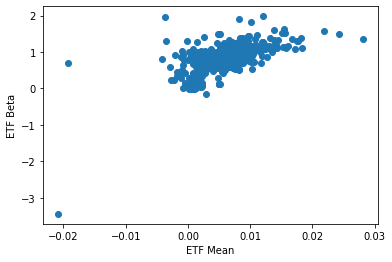

In [28]:
plt.scatter(betas['etf_mean'], betas['etf_beta'])
plt.xlabel('ETF Mean')
plt.ylabel('ETF Beta')
plt.show()

In [29]:
betas_ = betas[betas['etf_beta'].abs() > 3]
betas_

,symbol,asset_class,assets,factor,N_obs,etf_beta,etf_alpha,etf_corr,etf_mean,factor_mean,etf_std,factor_std,res_std
557,VIXY,Volatility,6.723594e+09,SPY,68,-3.444759,0.012019,-0.787777,-0.020847,0.009541,0.212548,0.048607,0.130921


C:\Users\Atakan\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


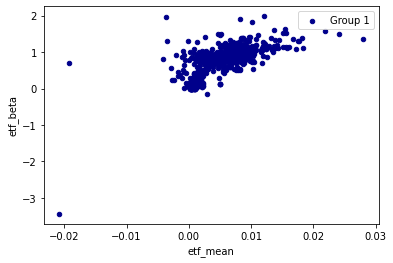

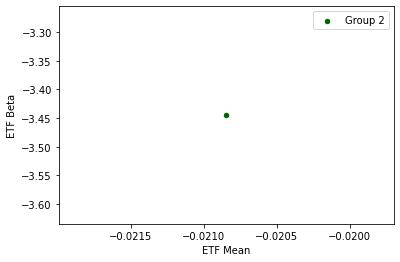

In [30]:
plt1 = betas.plot(kind='scatter', x='etf_mean',y='etf_beta', color='DarkBlue', label='Group 1');
df2.plot(kind='scatter', x='etf_mean',y='etf_beta', color='DarkGreen', label='Group 2');
plt.xlabel('ETF Mean')
plt.ylabel('ETF Beta')
plt.show()


In [33]:
import statsmodels.formula.api as smf
lm4b = smf.ols('etf_mean ~ etf_beta  - 1'  , data = betas ).fit()
lm4b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               etf_mean   R-squared (uncentered):                   0.779
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              2181.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                   5.21e-205
Time:                        03:06:09   Log-Likelihood:                          2659.8
No. Observations:                 620   AIC:                                     -5318.
Df Residuals:                     619   BIC:                                     -5313.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
etf_beta       0.0070      0.000     46.696      0.000       0.007       0.007
==============================================================================
Omnibus:                      119.617   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.961
Skew:                          -0.426   Prob(JB):                         0.00
Kurtosis:                      10.598   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
betas.groupby('asset_class')['etf_beta'].agg(['mean', 'count']).reset_index()

,asset_class,mean,count
0,Alternatives,0.410814,4
1,Bond,0.163586,136
2,Commodity,0.444231,16
3,Currency,-0.159612,1
4,Equity,0.989120,429
5,Multi-Asset,0.639679,12
6,Preferred Stock,0.467510,6
7,Real Estate,0.909913,15
8,Volatility,-3.444759,1


In [35]:
lm4b = smf.ols('etf_beta ~ asset_class  - 1'  , data = betas ).fit()
lm4b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               etf_beta   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     249.9
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          4.70e-187
Time:                        03:10:04   Log-Likelihood:                 77.556
No. Observations:                 620   AIC:                            -137.1
Df Residuals:                     611   BIC:                            -97.25
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
asset_class[Alternatives]        0.4108      0.108      3.820      0.000       0.200       0.622
asset_class[Bond]                0.1636      0.018      8.870      0.000       0.127       0.200
asset_class[Commodity]           0.4442      0.054      8.261      0.000       0.339       0.550
asset_class[Currency]           -0.1596      0.215     -0.742      0.458      -0.582       0.263
asset_class[Equity]              0.9891      0.010     95.250      0.000       0.969       1.010
asset_class[Multi-Asset]         0.6397      0.062     10.302      0.000       0.518       0.762
asset_class[Preferred Stock]     0.4675      0.088      5.324      0.000       0.295       0.640
asset_class[Real Estate]         0.9099      0.056     16.385      0.000       0.801       1.019
asset_class[Volatility]         -3.4448      0.215    -16.016      0.000      -3.867      -3.022
==============================================================================
Omnibus:                       73.647   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.592
Skew:                           0.667   Prob(JB):                     8.14e-36
Kurtosis:                       5.116   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

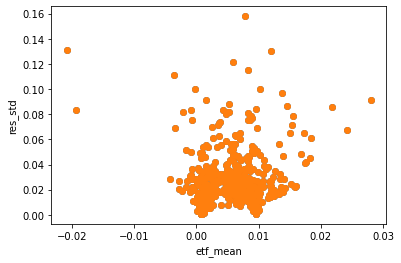

In [36]:
x= betas['etf_mean']
y= betas['res_std']
plt.scatter(x, y)
plt.xlabel('etf_mean')
plt.ylabel('res_std')
plt.scatter(x, y)

In [37]:
lm4b = smf.ols('etf_mean ~ res_std  - 1'  , data = betas ).fit()
lm4b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               etf_mean   R-squared (uncentered):                   0.423
Model:                            OLS   Adj. R-squared (uncentered):              0.422
Method:                 Least Squares   F-statistic:                              453.7
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                    6.17e-76
Time:                        03:16:22   Log-Likelihood:                          2362.4
No. Observations:                 620   AIC:                                     -4723.
Df Residuals:                     619   BIC:                                     -4718.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
res_std        0.1345      0.006     21.300      0.000       0.122       0.147
==============================================================================
Omnibus:                      220.462   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2186.247
Skew:                          -1.283   Prob(JB):                         0.00
Kurtosis:                      11.834   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""